In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
from src.data.data import DataProcessor

# Preprocess data
data_processor = DataProcessor(start='2021-03-25 00:00:00', 
                               end='2021-03-31 00:00:00', 
                               verbose=True)
data_processor.prepare_data(filename='bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv', 
                            do_detrend=False,
                            do_scale=False)

train = data_processor.databundle.train
val = data_processor.databundle.val

train.head()

Data loaded --------- data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
Using data from 2021-03-25 00:00:00 to 2021-03-31 00:00:00 with 8640 rows and 12 columns


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,SMA,RSI,MACD,log_ret,percent_ret
Timestamp,,,,,,,,,,,,
2021-03-25 00:00:00,52281.77,52391.38,52226.20,52349.40,14.822204,774792.603100,52272.428226,52621.4025,38.326161,-76.576821,0.001183,0.011835
2021-03-25 00:01:00,52291.72,52300.82,52112.87,52200.00,8.459723,441552.710060,52194.698981,52590.7450,32.909514,-93.409353,-0.002858,-0.028539
2021-03-25 00:02:00,52200.00,52212.72,52078.74,52094.86,0.944081,49196.334711,52110.273459,52549.4320,29.725556,-113.919977,-0.002016,-0.020142
2021-03-25 00:03:00,52068.79,52130.79,51961.44,52122.58,8.485409,441417.490470,52020.767888,52512.3475,31.604371,-126.480039,0.000532,0.005321
2021-03-25 00:04:00,52089.38,52361.50,52089.38,52361.50,8.715487,455074.022890,52214.408963,52485.3790,45.202808,-115.820031,0.004573,0.045838


In [21]:
import pandas as pd

train.reset_index(inplace=True)
train_long = pd.melt(train, id_vars=['Timestamp', 'Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'SMA', 'RSI', 'MACD', 'log_ret', 'percent_ret'], 
                     var_name='item_id', 
                     value_vars='Close',
                     value_name='target')

val.reset_index(inplace=True)
val_long = pd.melt(val, id_vars=['Timestamp', 'Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'SMA', 'RSI', 'MACD', 'log_ret', 'percent_ret'], 
                     var_name='item_id', 
                     value_vars='Close',
                     value_name='target')

train_long.head()

,Timestamp,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,SMA,RSI,MACD,log_ret,percent_ret,item_id,target
0,2021-03-25 00:00:00,52281.77,52391.38,52226.20,14.822204,774792.603100,52272.428226,52621.4025,38.326161,-76.576821,0.001183,0.011835,Close,52349.40
1,2021-03-25 00:01:00,52291.72,52300.82,52112.87,8.459723,441552.710060,52194.698981,52590.7450,32.909514,-93.409353,-0.002858,-0.028539,Close,52200.00
2,2021-03-25 00:02:00,52200.00,52212.72,52078.74,0.944081,49196.334711,52110.273459,52549.4320,29.725556,-113.919977,-0.002016,-0.020142,Close,52094.86
3,2021-03-25 00:03:00,52068.79,52130.79,51961.44,8.485409,441417.490470,52020.767888,52512.3475,31.604371,-126.480039,0.000532,0.005321,Close,52122.58
4,2021-03-25 00:04:00,52089.38,52361.50,52089.38,8.715487,455074.022890,52214.408963,52485.3790,45.202808,-115.820031,0.004573,0.045838,Close,52361.50


In [22]:
from autogluon.timeseries import TimeSeriesDataFrame

train_data = TimeSeriesDataFrame.from_data_frame(
    train_long,
    id_column="item_id",
    timestamp_column="Timestamp"
)

val_data = TimeSeriesDataFrame.from_data_frame(
    val_long,
    id_column="item_id",
    timestamp_column="Timestamp"
)

train_data.head()

Open      High       Low  Volume_(BTC)  \
item_id timestamp                                                         
Close   2021-03-25 00:00:00  52281.77  52391.38  52226.20     14.822204   
        2021-03-25 00:01:00  52291.72  52300.82  52112.87      8.459723   
        2021-03-25 00:02:00  52200.00  52212.72  52078.74      0.944081   
        2021-03-25 00:03:00  52068.79  52130.79  51961.44      8.485409   
        2021-03-25 00:04:00  52089.38  52361.50  52089.38      8.715487   

                             Volume_(Currency)  Weighted_Price         SMA  \
item_id timestamp                                                            
Close   2021-03-25 00:00:00      774792.603100    52272.428226  52621.4025   
        2021-03-25 00:01:00      441552.710060    52194.698981  52590.7450   
        2021-03-25 00:02:00       49196.334711    52110.273459  52549.4320   
        2021-03-25 00:03:00      441417.490470    52020.767888  52512.3475   
        2021-03-25 00:04:00      455074.022890    52214.408963  52485.3790   

                                   RSI        MACD   log_ret  percent_ret  \
item_id timestamp                                                           
Close   2021-03-25 00:00:00  38.326161  -76.576821  0.001183     0.011835   
        2021-03-25 00:01:00  32.909514  -93.409353 -0.002858    -0.028539   
        2021-03-25 00:02:00  29.725556 -113.919977 -0.002016    -0.020142   
        2021-03-25 00:03:00  31.604371 -126.480039  0.000532     0.005321   
        2021-03-25 00:04:00  45.202808 -115.820031  0.004573     0.045838   

                               target  
item_id timestamp                      
Close   2021-03-25 00:00:00  52349.40  
        2021-03-25 00:01:00  52200.00  
        2021-03-25 00:02:00  52094.86  
        2021-03-25 00:03:00  52122.58  
        2021-03-25 00:04:00  52361.50

In [27]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(
    prediction_length=60,
    target="target",
    # known_covariates_names=['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'SMA', 'RSI', 'MACD', 'log_ret', 'percent_ret'],
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)


Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'AutogluonModels\ag-20240109_004941'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
GPU Count:          1
Memory Avail:       2.79 GB / 15.90 GB (17.5%)
Disk Space Avail:   89.10 GB / 460.80 GB (19.3%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 60,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'T'
Provided train_data has 6048 rows, 1 time series. Median time series length is 6048 (min=6048, max=6

In [28]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


mean           0.1           0.2  \
item_id timestamp                                                       
Close   2021-03-29 04:48:00  55298.097656  55177.082031  55236.488281   
        2021-03-29 04:49:00  55293.468750  55167.296875  55231.449219   
        2021-03-29 04:50:00  55291.429688  55158.621094  55226.500000   
        2021-03-29 04:51:00  55289.183594  55149.574219  55220.863281   
        2021-03-29 04:52:00  55287.699219  55142.312500  55216.187500   

                                      0.3           0.4           0.5  \
item_id timestamp                                                       
Close   2021-03-29 04:48:00  55290.816406  55302.632812  55298.097656   
        2021-03-29 04:49:00  55286.742188  55294.906250  55293.468750   
        2021-03-29 04:50:00  55284.152344  55291.925781  55291.429688   
        2021-03-29 04:51:00  55280.105469  55290.066406  55289.183594   
        2021-03-29 04:52:00  55276.597656  55289.324219  55287.699219   

                                      0.6           0.7           0.8  \
item_id timestamp                                                       
Close   2021-03-29 04:48:00  55295.539062  55319.355469  55303.625000   
        2021-03-29 04:49:00  55290.453125  55315.382812  55299.726562   
        2021-03-29 04:50:00  55289.687500  55316.023438  55301.652344   
        2021-03-29 04:51:00  55289.355469  55316.820312  55304.691406   
        2021-03-29 04:52:00  55289.679688  55317.429688  55308.078125   

                                      0.9  
item_id timestamp                          
Close   2021-03-29 04:48:00  55310.214844  
        2021-03-29 04:49:00  55306.226562  
        2021-03-29 04:50:00  55308.535156  
        2021-03-29 04:51:00  55312.132812  
        2021-03-29 04:52:00  55316.003906

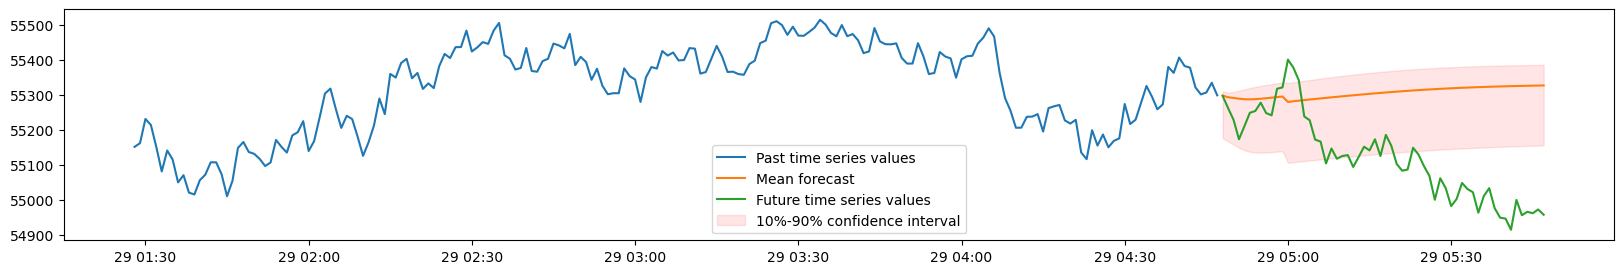

In [29]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
# test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "Close"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = val_data.loc[item_id]["target"][0:60]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label="10%-90% confidence interval"
)
plt.legend()